# What sells a car?

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The goal of this project is to analyze what factors influence the process of selling a car through free advertisements.


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

Let's load the project data and have a look at the general information.

In [2]:
# Load the data file into a DataFrame
try: 
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# Ivestigate general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


From the general info above we can conclude that there are five columns with missing data, about which we must make a decision about necessity to filling them in. 
The 'is_4wd' column contains the most mising values (about a half of total). 
 
The format of the data in 'model_year' and 'odometer' columns is 'float64' ans should be changed to 'int'

Now let's see if we have any duplicates in our data. If we do, we'll need to decide what we will do with them.

In [5]:
# Checking duplicates
print(df.duplicated().sum())

0


There are no duplicates in our dataset.

### Conclusions and further steps

Initial data obviously should be preprossesed before working with them. Missing values should be investigated in order to make a conclusion should we fill them in or not. 
Format of some columns and register should be changed.
We will investigate all the five columns with missing values and then change the data types of two columns from 'float' to 'int'.


## Treat missing values (if any)


Let's look at the percentage of missing data in the dataset

In [6]:
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df.isnull().sum()/len(df),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
is_4wd,25953,0.504
paint_color,9267,0.180
odometer,7892,0.153
cylinders,5260,0.102
model_year,3619,0.070
price,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000
transmission,0,0.000


Different part of data is missed for each column with missing values. 
7% of total data with model year may be not very significant while 'is_4wd' contain more than 50% of missing data. 
Let's decide what to do with each column.
First column with the majority of missing values is 'is_4wd'. Let's look at data contained in this column.


In [7]:
df['is_4wd'].unique()

array([ 1., nan])

There are only two values in  'is_4wd' column - 1 means that the car has 4-wheel drive and 'nan' - it's obvious that it means no 4-wheel drive for corresponding data. We can replace it to '0'.

In [8]:
# Replacing missing values to '0' - it means that corresponding car has no 4-wheel drive
df['is_4wd'].fillna(0, inplace = True)


In [9]:
# Let's count values in order to make sure that amount of '0' is equal to the previous amount of 'nan'
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Amount of 'NaN' values identified above is equal to '0' values now.

Let's look at the next column with missing values, 'paint_color'.

In [10]:
# Check the distribution of values
df['paint_color'].value_counts(normalize=True)

white     0.237328
black     0.182025
silver    0.147759
grey      0.119196
blue      0.105897
red       0.104619
green     0.033035
brown     0.028941
custom    0.027285
yellow    0.006034
orange    0.005466
purple    0.002414
Name: paint_color, dtype: float64

We can't conclude that there is for example one main colour in our dataset and we can replace missing values to this colour. The car's colour depends only on the owner decision.
So the best decision will be not to fill in these data.

For columns with missing values such as 'cylinders' and 'model_year' we can try to fill in with the median values of grouped data basing on the model. 

In [11]:
df_transformed_cylinders = df.groupby('model')['cylinders'].transform('median')

df['cylinders'] = df['cylinders'].fillna(df_transformed_cylinders)

df_transformed_model_year = df.groupby('model')['model_year'].transform('median')

df['model_year'] = df['model_year'].fillna(df_transformed_model_year)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Fix data types


From the info method above we can see that all numeric data are in correct format.
The only column with wrong format is 'date_posted' - it's in 'object' type while it's better to have a 'date' type here.
Let's change the data type for this column.

In [12]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enrich data

Let's add additional factors to the data to make the analysis easier.

In [13]:
# Add datetime values for when the ad was placed
df['yyyy'] = pd.to_datetime(df['date_posted']).dt.year
df['mm'] = pd.to_datetime(df['date_posted']).dt.month
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,yyyy,mm
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018,6
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2019,3
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2018,7
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2


In [14]:
# Add the vehicle's age when the ad was placed
df['age'] = df['yyyy']-df['model_year']
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,yyyy,mm,age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018,6,7.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,7.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2019,3,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,2.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,4.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2018,7,6.0
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,11.0


In [15]:
# Add the vehicle's average mileage per year
df['odometer'] = df['odometer'].fillna(0)
df['age'] = df['age'].fillna(0)
def average_mileage(row):
    odometer = row.odometer
    age = row.age
    if odometer != 0 and age != 0:
        return odometer/age
    return 0

In [16]:
# Test if the function works
row = df.iloc[0,:]
print(average_mileage(row)) 

20714.285714285714


In [17]:
# Creating new column based on function
# Apply function to the average_mileage
df['average_mileage'] = df.apply(average_mileage, axis = 1)
df[df['average_mileage'].isna()].shape

(0, 17)

In [18]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,yyyy,mm,age,average_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018,6,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,NaN,0.0,2019-03-22,9,2019,3,16.0,0.000000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,2.0,40451.500000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,4.0,14488.500000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3.0,26404.000000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1,6.0,18245.500000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2018,7,6.0,17362.333333
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,11.0,13381.000000


In [19]:
# It might help to replace the condition values with something that can be manipulated more easily
df['average_mileage'] = df['average_mileage'].astype(int)
df['price'] = df['price'].astype(int)

In [20]:
# In the condition column, replace string values with a numeric scale
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [21]:
# Let's replace: new = 5 like new =  4 excellent = 3 good = 2 fair = 1 salvage = 0
df = df.replace({'condition':{'new':5, 'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}})
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,yyyy,mm,age,average_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018,6,7.0,20714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,7.0,12672
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,6.0,18333
3,1500,2003.0,ford f-150,1,8.0,gas,0.0,automatic,pickup,NaN,0.0,2019-03-22,9,2019,3,16.0,0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,2.0,40451
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,4.0,14488
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3.0,26404
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1,6.0,18245
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2018,7,6.0,17362
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,11.0,13381


## Check clean data

In [22]:
# print the general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int32         
 1   model_year       51525 non-null  float64       
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      42258 non-null  object        
 10  is_4wd           51525 non-null  float64       
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  yyyy             51525 non-null  int64         
 14  mm               51525 non-null  int64

In [23]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,yyyy,mm,age,average_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2018,6,7.0,20714
1,25500,2011.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10,7.0,12672
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,2,6.0,18333
3,1500,2003.0,ford f-150,1,8.0,gas,0.0,automatic,pickup,NaN,0.0,2019-03-22,9,2019,3,16.0,0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4,2.0,40451
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,6,4.0,14488
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,12,3.0,26404
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2019,1,6.0,18245
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2018,7,6.0,17362
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2019,2,11.0,13381


## Study core parameters

Let's check the following parametres for outliers which can make the analysis more difficult.
The parameters are:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

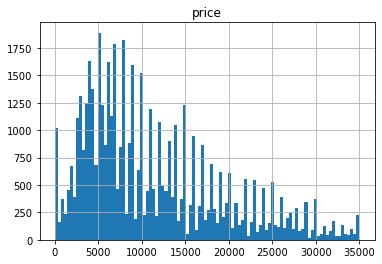

In [25]:
df.hist('price', bins=100, range=(0, 35000))
plt.show()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

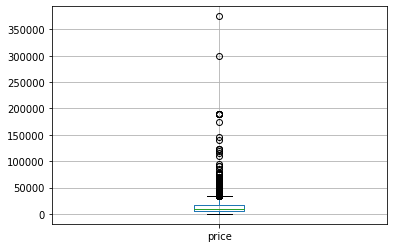

In [25]:
df.boxplot(column=['price'])
df['price'].describe()

It looks like there are outliers in price data. High maximum value compared to the mean. High value of standard diviation.
On the other side, minimum value is 1 which seems to be impossible price.
Box plot also shows ouliers - 300 and more than 350 thousand.

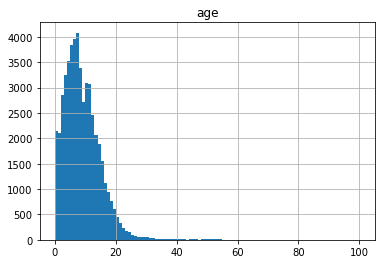

In [26]:
df.hist('age', bins=100, range=(0, 100))
plt.show()

count    51525.000000
mean         8.513508
std          6.112895
min          0.000000
25%          4.000000
50%          7.500000
75%         12.000000
max        110.000000
Name: age, dtype: float64

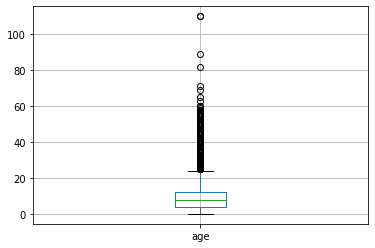

In [27]:
df.boxplot(column=['age'])
df['age'].describe()

Age parameter also contains outliers which are seen at the boxplot. 
Maximum value is 110 while mean is 7.95. Also there are several otliers which are more than 80.

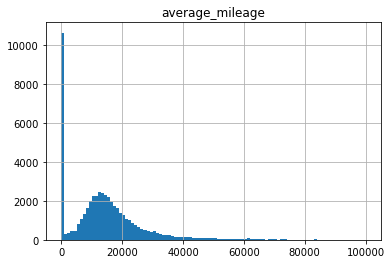

In [27]:
df.hist('average_mileage', bins=100, range=(0, 100000))
plt.show()

count     51525.000000
mean      14304.277846
std       13362.763351
min           0.000000
25%        5884.000000
50%       12909.000000
75%       19273.000000
max      279365.000000
Name: average_mileage, dtype: float64

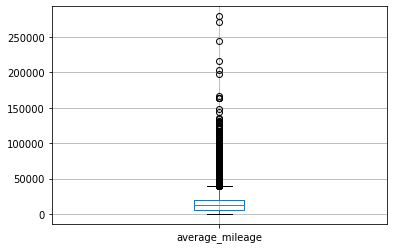

In [29]:
df.boxplot(column=['average_mileage'])
df['average_mileage'].describe()

Again, some outliers are among average_mileage parameter. 

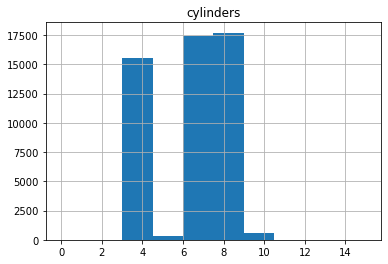

In [28]:
df.hist('cylinders', bins=10, range=(0, 15))
plt.show()

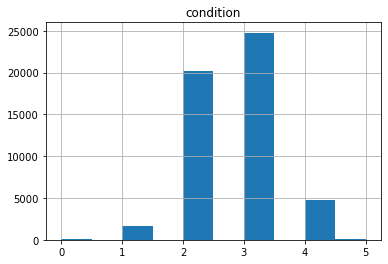

In [29]:
df.hist('condition', bins=10)
plt.show()

According to histograms there are no otliers in condition and cylinders were identified.



## Study and treat outliers

Let's remove outliners from the age, average_mileage and price columns.


In [32]:
print("Old Shape: ", df.shape)

Old Shape:  (51525, 17)


In [31]:
# Determine the lower limits for outliers
cols = ['age', 'average_mileage', 'price']
Q1 = df[cols].quantile(0.25)

In [32]:
# Determine the upper limits for outliers
Q3 = df[cols].quantile(0.75)

In [33]:
# Store data without outliers in a separate DataFrame
IQR = Q3 - Q1

new_df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("New Shape: ", new_df.shape)


New Shape:  (47242, 17)


## Study core parameters without outliers

Let's make new plots using filtered data and compare them with the previous ones.


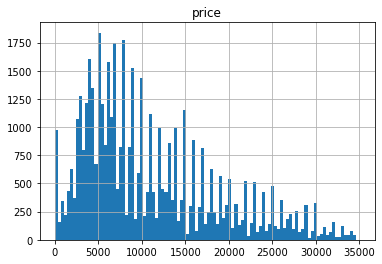

In [34]:
new_df.hist('price', bins=100, range=(0, 35000))
plt.show()

count    47242.000000
mean     10923.771707
std       7724.255269
min          1.000000
25%       4995.000000
50%       8847.000000
75%      15453.750000
max      34595.000000
Name: price, dtype: float64

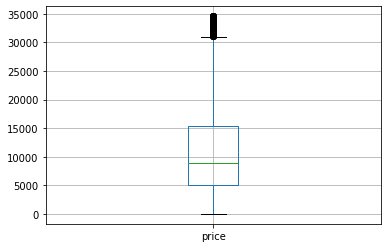

In [37]:
new_df.boxplot(column=['price'])
new_df['price'].describe()

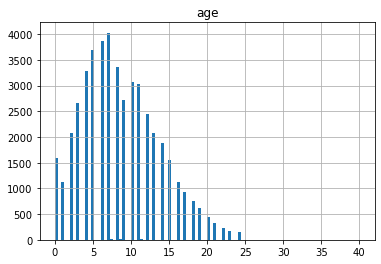

In [35]:
new_df.hist('age', bins=100, range=(0, 40))
plt.show()

count    47242.000000
mean     10923.771707
std       7724.255269
min          1.000000
25%       4995.000000
50%       8847.000000
75%      15453.750000
max      34595.000000
Name: price, dtype: float64

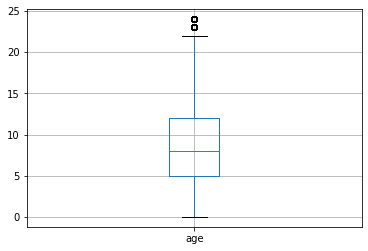

In [39]:
new_df.boxplot(column=['age'])
new_df['price'].describe()

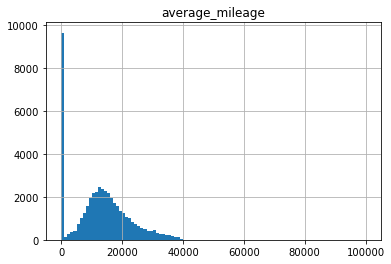

In [36]:
new_df.hist('average_mileage', bins=100, range=(0, 100000))
plt.show()

count    47242.000000
mean     12770.761928
std       9234.994507
min          0.000000
25%       6319.000000
50%      12744.500000
75%      18427.000000
max      39350.000000
Name: average_mileage, dtype: float64

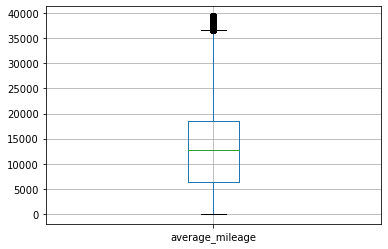

In [37]:
new_df.boxplot(column=['average_mileage'])
new_df['average_mileage'].describe()

Outliers are removed, we can continue the analysis basing on cleared data.

## Ads lifetime

Let's study how many days advertisements were displayed. 



count    47242.000000
mean        39.535413
std         28.225942
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
Median: 33.0


<AxesSubplot:>

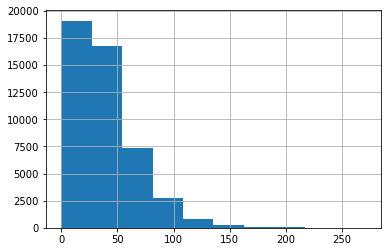

In [38]:
print(new_df['days_listed'].describe())
print("Median:", new_df['days_listed'].median())
new_df['days_listed'].hist()

Let's remove the outliers before analysis.

New Shape:  (45757, 17)
AxesSubplot(0.125,0.125;0.775x0.755)
Median: 32.0
count    45757.000000
mean        36.643596
std         23.168563
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        104.000000
Name: days_listed, dtype: float64


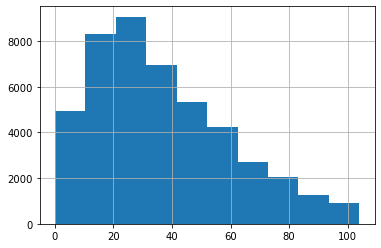

In [39]:
# Creating lower and upper limits
Q1_1 = new_df['days_listed'].quantile(0.25)
Q3_1 = new_df['days_listed'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

new_df_2 = new_df[~((new_df['days_listed'] < (Q1_1 - 1.5 * IQR_1)) |(new_df['days_listed'] > (Q3_1 + 1.5 * IQR_1)))]

print("New Shape: ", new_df_2.shape)
print(new_df_2['days_listed'].hist())
print("Median:", new_df_2['days_listed'].median())
print(new_df_2['days_listed'].describe())

Mean (32) and median (36) are almost the same. Typical life of an ad is 36 days (1 month)

Some ads were removed quickly (25% of dataset were removed within 18 days)

There are also abnormally long time for ads for some reason - more than three months (even after removing outliers we still have the maximum period equal to 104 days)


## Average price per each type of vehicle

Let's analyze the number of ads and the average price for each type of vehicle. 

Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [40]:
average_price = new_df_2.pivot_table(
    index='type', values='price', aggfunc=['mean']
)
print(average_price)
average_price.describe()


                     mean
                    price
type                     
SUV          10213.705081
bus          17445.913043
convertible  12829.288630
coupe        13253.981987
hatchback     6686.210913
mini-van      7813.107750
offroad      14080.520231
other         9983.859031
pickup       14544.537941
sedan         6809.659159
truck        14620.859788
van           8508.915905
wagon         8783.497214


,mean
,price
count,13.000000
mean,11198.004360
std,3460.780662
min,6686.210913
25%,8508.915905
50%,10213.705081
75%,14080.520231
max,17445.913043


In [41]:
adv_count = new_df_2.pivot_table(
    index='type', values='price', aggfunc=['count']
)
print(adv_count)
adv_count.describe()

             count
             price
type              
SUV          11237
bus             23
convertible    343
coupe         1943
hatchback      953
mini-van      1058
offroad        173
other          227
pickup        6062
sedan        11278
truck        10477
van            547
wagon         1436


,count
,price
count,13.000000
mean,3519.769231
std,4539.534744
min,23.000000
25%,343.000000
50%,1058.000000
75%,6062.000000
max,11278.000000


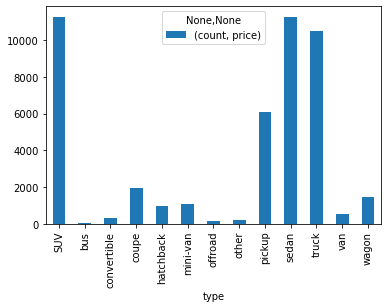

In [42]:
adv_count.plot(kind='bar')
plt.show()

The two most popular types are SUV and sedan

## Price factors

Let's analyse What factors impact the price most. We will take each of the popular types (SUV and sedan) at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. 

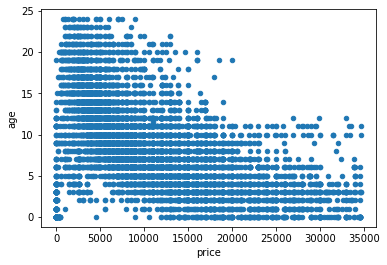

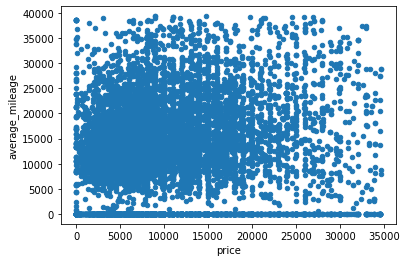

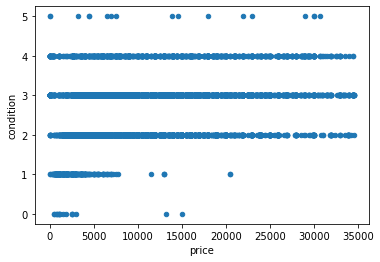

In [43]:
new_df_2.query('type == "SUV"').plot(x = 'price', y='age', kind='scatter')
new_df_2.query('type == "SUV"').plot(x = 'price', y='average_mileage', kind='scatter')
new_df_2.query('type == "SUV"').plot(x = 'price', y='condition', kind='scatter')
plt.show()

It can be concluded from the plots above that there is some dependance between price and average_mileage.

C:\Users\amass\AppData\Local\Temp\ipykernel_22172\2619027795.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['automatic', 'manual', 'other'])


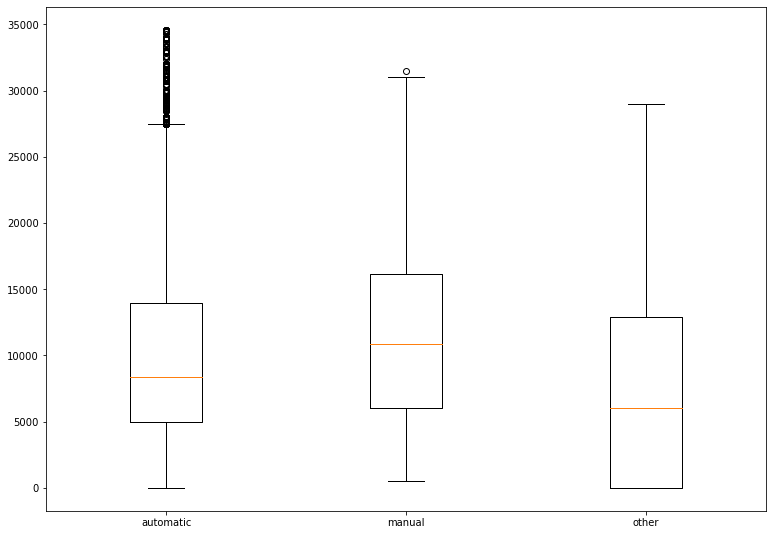

In [44]:
#Creating datatset
data_1 = new_df_2.query('transmission == "automatic" and type == "SUV"')['price']
data_2 = new_df_2.query('transmission == "manual" and type == "SUV"')['price']
data_3 = new_df_2.query('transmission == "other" and type == "SUV"')['price']
data = [data_1, data_2, data_3]

fig = plt.figure(figsize =(10,7))

#Creating axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['automatic', 'manual', 'other'])

#Creating plot
bp = ax.boxplot(data)

#Show plot
plt.show()


From the bopxplots above we can identify some large values for automatic transmission but they looks like outliers (above the upper limit) and can't be seriously treated as those which influence the price.
In general, manual type of transmission is more expensive for SUV.

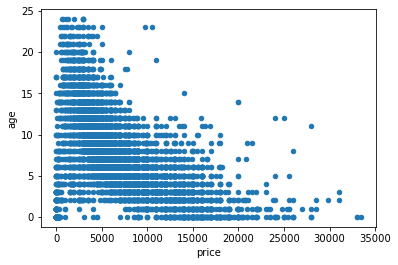

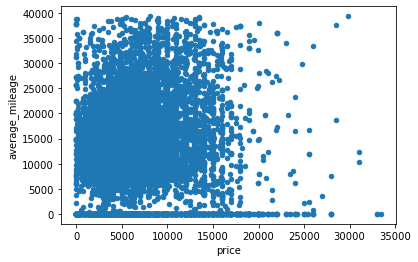

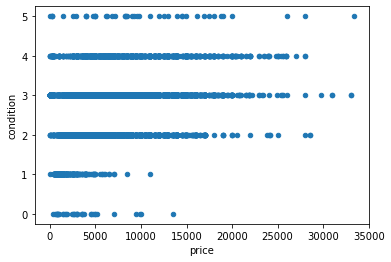

In [45]:
new_df_2.query('type == "sedan"').plot(x = 'price', y='age', kind='scatter')
new_df_2.query('type == "sedan"').plot(x = 'price', y='average_mileage', kind='scatter')
new_df_2.query('type == "sedan"').plot(x = 'price', y='condition', kind='scatter')
plt.show()

There is the similar plots for sedan type, the one with average_mileage also looks like showing factors connected to price.

C:\Users\amass\AppData\Local\Temp\ipykernel_22172\540839202.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['automatic', 'manual', 'other'])


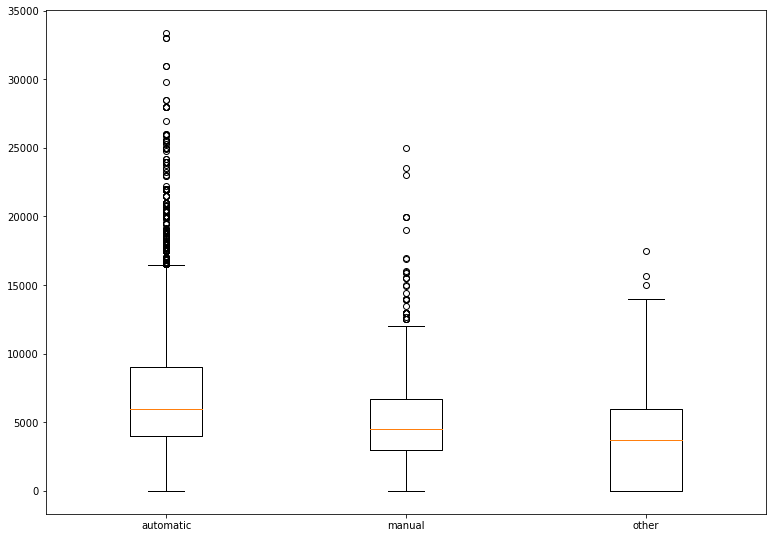

In [46]:
#Creating datatset
data_4 = new_df_2.query('transmission == "automatic" and type == "sedan"')['price']
data_5 = new_df_2.query('transmission == "manual" and type == "sedan"')['price']
data_6 = new_df_2.query('transmission == "other" and type == "sedan"')['price']
data = [data_4, data_5, data_6]

fig = plt.figure(figsize =(10,7))

#Creating axes instance
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['automatic', 'manual', 'other'])

#Creating plot
bp = ax.boxplot(data)

#Show plot
plt.show()

Boxplots are also similar to those we have made for SUV type. The price for sedan with automatic transmission is more expensive in general.

                      age  average_mileage  condition
age              1.000000        -0.269875  -0.323075
average_mileage -0.269875         1.000000  -0.009210
condition       -0.323075        -0.009210   1.000000


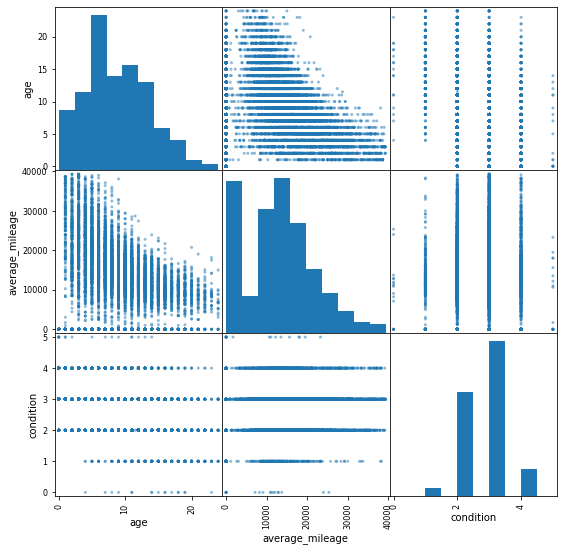

In [47]:
# Let's make a correlation matrix and correlation plots 
# to see the possible connection between price and age, average mileage and condition for SUV and for sedan separately.
df_SUV = new_df_2.loc[new_df_2['type'] == "SUV", ['age', 'average_mileage', 'condition']]
print(df_SUV.corr())
pd.plotting.scatter_matrix(df_SUV, figsize=(9, 9))
plt.show()

                      age  average_mileage  condition
age              1.000000        -0.217747  -0.303571
average_mileage -0.217747         1.000000  -0.039169
condition       -0.303571        -0.039169   1.000000


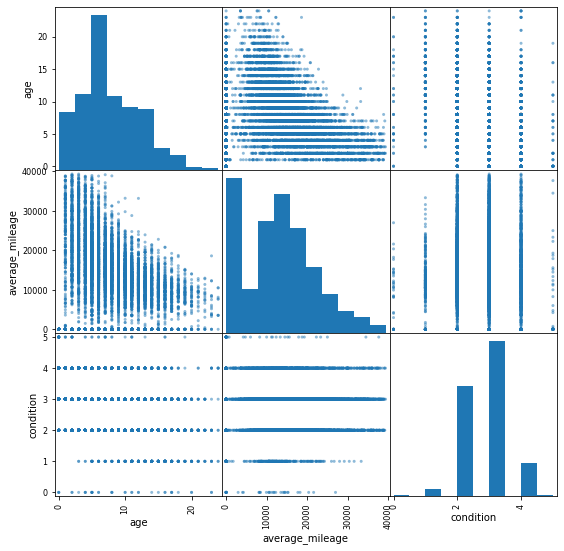

In [48]:
df_sedan = new_df_2.loc[new_df_2['type'] == "sedan", ['age', 'average_mileage', 'condition']]
print(df_sedan.corr())
pd.plotting.scatter_matrix(df_sedan, figsize=(9, 9))
plt.show()

According to correlation matrixes and correlation plots there isn't some strong correlation between parameters analysed.

## General conclusion



We have addressed all the issued identified in the data received: missing values, duplicates, categorical data wich are not convinient to analyse ('condition' column).

Five columns with missing data were identified. We have filled in the values for three of them (is_4wd, cylinders and model_year, odometer) and decided not to do anything with 'paint_color' column because the car's colour depends only on the owner's choice. These data might be forgotten to be filled in.

For filling in values in is_4wd column we have chosen the zero value - it means that the vehicle has no 4-wheel drive.

Missig values in 'odometer' were also filled in with zero.

'Cylinders' and 'model_year' columns were filled in basing on median of corresponding model.

We checked tha data for duplicates but they were not identified in our dataset.

We have analysed the dataset given trying to identify any possible correlation between different criterias and price of a car as well as frequeancy of advertising of each type of vehicle.

We have checked age, average mileage, condition and transmission type for possible correlation with price.

We have identified that there is no connection between age and condition with price - correlation coeffiсient were far from 1 or -1. 

On the other hand, there can be a correlation between average mileage and price. It is seen from the corresponding scatter plots.

Price is also can be connected with transmission type for different group of vehicles. We have checked this for the two most popular groups in our dataset: in general, price for manual transmission is higher for SUV but lower for for sedan.

Overall conclusion is that among all the criterias analysed average mileage and transmission type are those which can potentially influence the price for the dataset given. 